In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report


In [38]:
import pandas as pd # data processing
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # editing visualizations
from matplotlib import style # setting styles for plots
from sklearn.preprocessing import StandardScaler # normalizing data
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.metrics import accuracy_score # algorithm accuracy
from sklearn.model_selection import train_test_split # splitting the data

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [40]:
df = pd.read_csv('datasets/daily_houston_data.csv').dropna()

In [41]:
df.rain_tomorrow.value_counts()

0    5049
1    1525
Name: rain_tomorrow, dtype: int64

In [42]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [43]:
input_cols = [
                # 'temperature',
                # 'dewpoint_temperature',
                # 'relative_humidity',
                'cloud_cover',  
                'precipitation',
                # 'wind_speed'
]

In [44]:
x_train = train[input_cols]

y_train = train[['rain_tomorrow']]

In [45]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)

In [46]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)
x_train = x_train_resampled
y_train = y_train_resampled

y_train.value_counts()
x_val = validate[x_train.columns].copy()
y_val = validate[y_train.columns].copy()



In [47]:
x_test = test[input_cols]

y_test = test[['rain_tomorrow']]

In [48]:
model = KNeighborsClassifier() 
model.fit(x_train, y_train)

c:\Users\Anchey Peng\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [49]:
pred = model.predict(x_test)

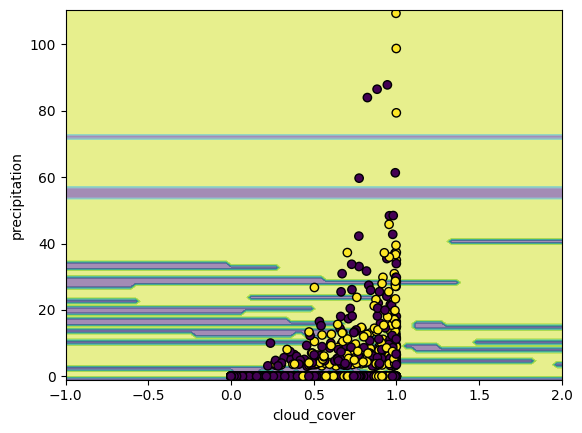

In [50]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
  model, x_test, response_method="predict",
  # xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
  alpha=0.5,
  )

disp.ax_.scatter(x_test.to_numpy()[:, 0], x_test.to_numpy()[:, 1], c=y_test.to_numpy(), edgecolor="k")

plt.show()

In [51]:
# x_train, x_test, y_train, y_test = train_test_split( test_size=0.33, random_state=41) 
n_neighbors = 10
h           = .02
X = df[['min_temp', 
        'max_temp', 
        'wind_speed3pm', 
        'humidity3pm', 
        'humidity9am',
        'pressure3pm', 
        'pressure9am',
        'temp9am',
        'temp3pm',
        'rainfall']]
y = df[['rain_tomorrow']]
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

print(X)
print(y)

for weights in ['uniform', 'distance']:
  clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
  clf.fit(x_train, y_train)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

KeyError: "None of [Index(['min_temp', 'max_temp', 'wind_speed3pm', 'humidity3pm', 'humidity9am',\n       'pressure3pm', 'pressure9am', 'temp9am', 'temp3pm', 'rainfall'],\n      dtype='object')] are in the [columns]"

In [52]:
print('R squared: {:.2f}'.format(model.score(x_train,y_train)*100))

R squared: 84.46


In [53]:
print('R squared: {:.2f}'.format(model.score(x_test,y_test)*100))

R squared: 63.65


In [54]:
print('R squared: {:.2f}'.format(model.score(x_val,y_val)*100))

R squared: 63.19
